In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []
speed_y = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []
roll = []
pitch = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
#time_crop = 4000
time_crop1 = 170
time_crop2 = 243

# File loading from relative path
#file = '../../../Data/ISER2021/China-catabot-20201006.csv'
file = '../../../Data/ISER2021/Sunapee-catabot-20200911-house.csv'
# File loading from relative path
#file2 = '../../../Data/ISER2021/China-catabot-20201006-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        #if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[6]))
            speed_y.append(float(row[11]))
            roll.append(float(row[16]))
            pitch.append(float(row[17]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[31]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

"""
# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        if current_time - initial_time <= time_crop:
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)
"""

"\n# wp data \nwith open(file2, 'r') as csvfile2:\n    csvreader2 = csv.reader(csvfile2, delimiter=',')\n    header = next(csvreader2)\n    for row in csvreader2:\n        current_time = float(row[0])\n        \n        if current_time - initial_time <= time_crop:\n        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:\n            wp_time.append(float(row[0]))\n            wp_seq.append(float(row[1]))\n            \n    for time_stamp in wp_time:\n        standardized_time2.append(time_stamp - minimum_time)\n"

### Compass heading

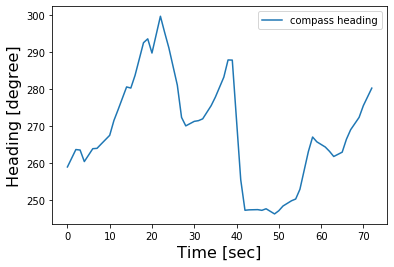

In [4]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
ax1.legend()

    
plt.show()

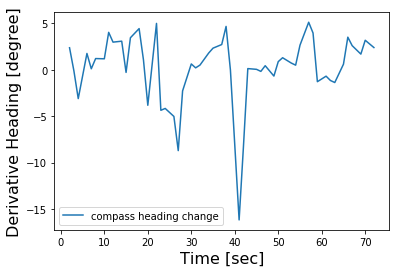

In [5]:
# Figure initialization
fig, ax1 = plt.subplots()

dt_list = []
dy_list = []

for i, data in enumerate(compass_heading):
    if i == 0:
        continue
    else:
        dt_list.append(standardized_time[i] - standardized_time[i-1])
        compass_difference = compass_heading[i] - compass_heading[i-1]
        if 270 <= compass_heading[i-1] < 360 and 0<= compass_heading[i] <=90:
            compass_difference += 360
        elif 270 <= compass_heading[i] < 360 and 0<= compass_heading[i-1] <=90:
            compass_difference -= 360
        dy_list.append(compass_difference)
        
dt_list = np.array(dt_list)
dy_list = np.array(dy_list)

        
ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Derivative Heading [degree]', fontsize=16)
ax1.plot(standardized_time[1:], dy_list/dt_list, label='compass heading change')
ax1.legend()

    
plt.show()

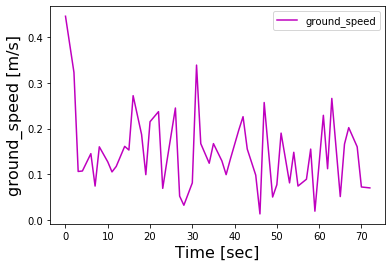

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed', color='m')
ax1.legend()

plt.show()

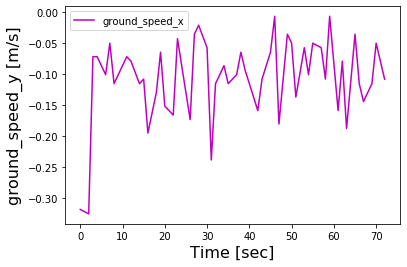

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_y [m/s]', fontsize=16)
ax1.plot(standardized_time, speed_y, label='ground_speed_x', color='m')
ax1.legend()
    
plt.show()

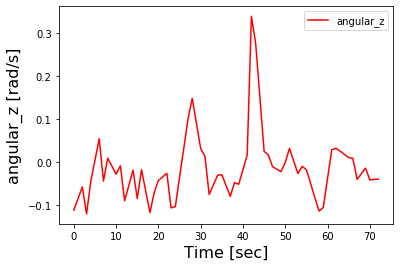

In [8]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()
    
plt.show()

### Temperature

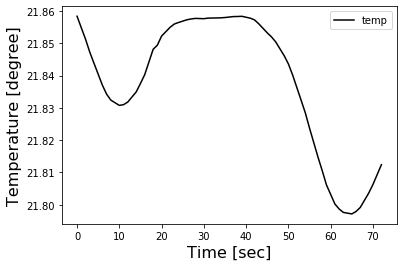

Standard Deviation of the temp is 0.020953256073918732 
Mean of the temp is 21.837943500942654 


In [9]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

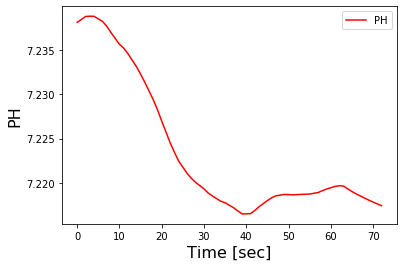

Standard Deviation of the temp is 0.007710382320694935 
Mean of the temp is 7.223559971208926 


In [10]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
ax1.legend()
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

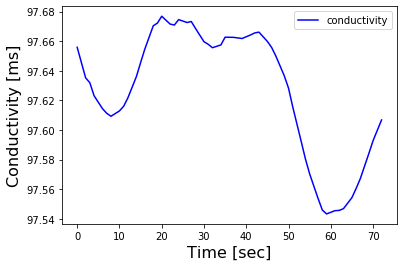

Standard Deviation of the chlorophyll is 0.043320703885631126 
Mean of the chlorophyll is 97.62651062011719 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
ax1.legend()
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

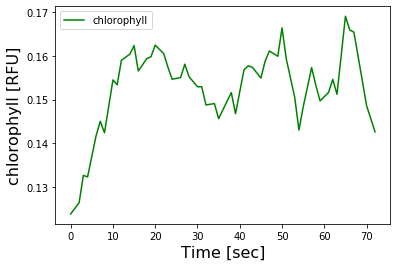

Standard Deviation of the chlorophyll is 0.009317937022698954 
Mean of the chlorophyll is 0.1527276971825847 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

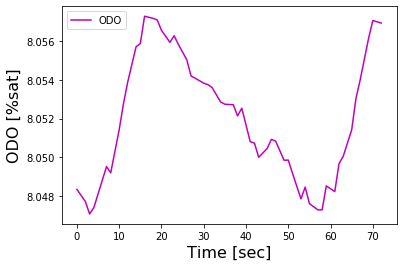

Standard Deviation of the DO is 0.0032174749845725816 
Mean of the DO is 8.051993211110434 


In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
ax1.legend()

plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

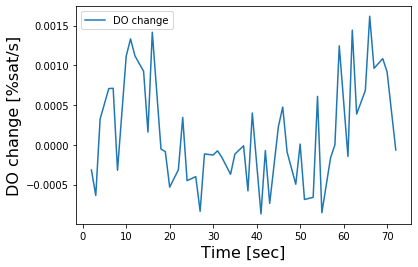

In [14]:
# Figure initialization
fig, ax1 = plt.subplots()

dt_list = []
dy_list = []

for i, data in enumerate(ODO):
    if i == 0:
        continue
    else:
        dt_list.append(standardized_time[i] - standardized_time[i-1])
        dy_list.append(ODO[i] - ODO[i-1])
        
dt_list = np.array(dt_list)
dy_list = np.array(dy_list)

        
ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('DO change [%sat/s]', fontsize=16)
ax1.plot(standardized_time[1:], dy_list/dt_list, label='DO change')
ax1.legend()

plt.show()

### Sonar depth

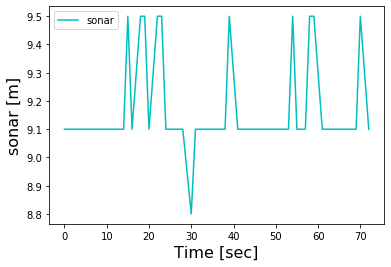

In [15]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()
    
plt.show()

Text(0, 0.5, 'Pitch Velocity \n (rad/s)')

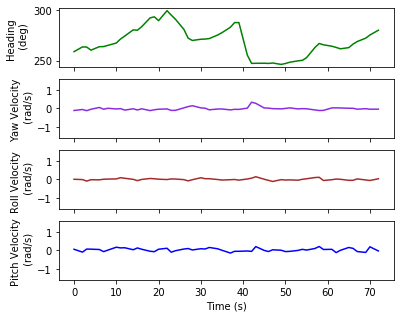

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,5))
#fig.suptitle('Vertically stacked subplots')

axis = (ax1, ax2, ax3, ax4)

ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
#ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading \n (deg)')


ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.6, 1.6])
#ax2.set_xlabel('Time (s)')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('Yaw Velocity \n (rad/s)')

ax3.plot(standardized_time, roll, color='brown')
ax3.set_ylim([-1.6, 1.6])
#ax3.set_xlabel('Time (s)')
ax3.tick_params(labelbottom=False)
ax3.set_ylabel('Roll Velocity \n (rad/s)')

ax4.plot(standardized_time, pitch, color='blue')
ax4.set_ylim([-1.6, 1.6])
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Pitch Velocity \n (rad/s)')

#fig.savefig('0812-house-turning-heading.pdf', bbox_inches ='tight')

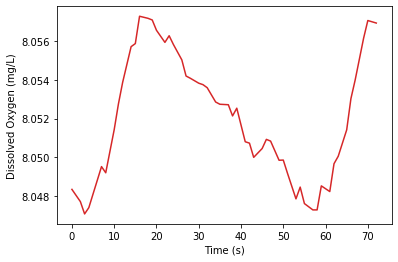

In [17]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Dissolved Oxygen (mg/L)')
ax1.plot(standardized_time, ODO, label='ODO', color=color)
ax1.tick_params(axis='y')
#ax1.legend()

"""
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Conductivity (mS/cm)', color=color)
ax2.plot(standardized_time, cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
plt.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
"""
plt.show()

#fig.savefig('0812-house-turning-DO.pdf', bbox_inches ='tight')